<a href="https://colab.research.google.com/github/Olin-RoboSys/test-colab/blob/main/Module_1b_Image_processing_(deep_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1B: 2D Image Processing using Deep Learning

### Goals:
1. Students have basic conceptual understanding of how neural networks work (incl. training and prediction)
2. Students are able to use existing Python libraries to perform deep learning-based computer vision
3. Students can develop an deep learning-based computer vision pipeline to perform main tasks:
  - Image classification
  - Segmentation (semantic, instance)
  - Object detection
4. Students can evaluate the performance of deep learning-based computer vision pipeline to inform pipeline improvements


![](https://ars.els-cdn.com/content/image/1-s2.0-S0925521423003484-gr5.jpg)

In [30]:
# install pytorch
!pip install torch torchvision

In [31]:
# install numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Basics of Deep Learning & Neural Networks

## Section 2: Basics of PyTorch (a deep learning framework)


In [31]:
# resources:
# 1. https://learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/

## Section 3: Segmentation

In [179]:
import torch
import torchvision.transforms as T
import torchvision.models.segmentation as segmentation_models
from torchvision.models.segmentation import FCN_ResNet50_Weights, FCN_ResNet101_Weights, LRASPP_MobileNet_V3_Large_Weights

# import python image library
from PIL import Image

In [182]:
weights = LRASPP_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1.DEFAULT
# weights = DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT
weights.meta["categories"]

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

### Semantic Segmentation



#### Load model and pre-trained weights

In [89]:
# load a pretrained model
model = segmentation_models.deeplabv3_resnet50(pretrained=True)
# model = segmentation_models.fcn_resnet101(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [81]:
!pip install timm
# `timm` is a deep-learning library created by Ross Wightman and is a collection of SOTA computer vision models
# https://timm.fast.ai/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.1 MB/s eta 0:00:00


In [84]:
import timm

available_pretrained_models = timm.list_models(pretrained=True)
available_pretrained_models[:500]

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

#### Load and preprocess the image

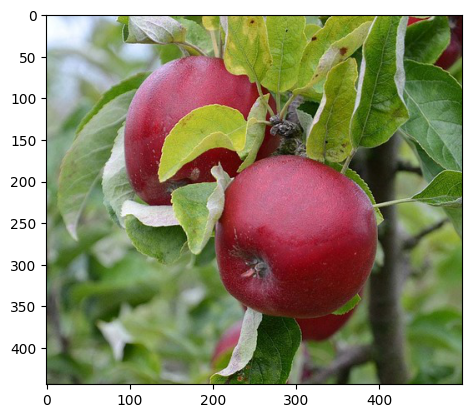

In [77]:
# load the image
# img_path = 'orange.png'
img_path = 'apple.png'
# img_path = 'horse.jpeg'
img = Image.open(img_path).convert('RGB') # make sure it is loaded in RGB
plt.imshow(img)

In [78]:
# pre-process the image

# there are a couple of steps
#   1. resize the image to (256 x 256)
#   2. center crop it to (224 x 224)
#   3. convert it to a Tensor (NB: all values are scaled to [0, 1])
#   4. normalize the image with the ImageNet specific parameters: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]

preprocess_fcn = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

# unsqueeze the image dimensions
img_preprocess = preprocess_fcn(img).unsqueeze(0)

#### Predict and decode result

In [79]:
# make prediction
with torch.no_grad():
    output = model(img_preprocess)['out'][0]

# output.shape
# So, out is the final output of the model. As we can see, its shape is [1 x 21 x H x W], as discussed earlier. Since, the model was trained on 21 classes, the output has 21 channels!

# decode result
output = output.squeeze().detach().cpu().numpy(); print(output.shape)
output = np.argmax(output, axis=0); print(output.shape)

(21, 224, 224)
(224, 224)


#### Plot result


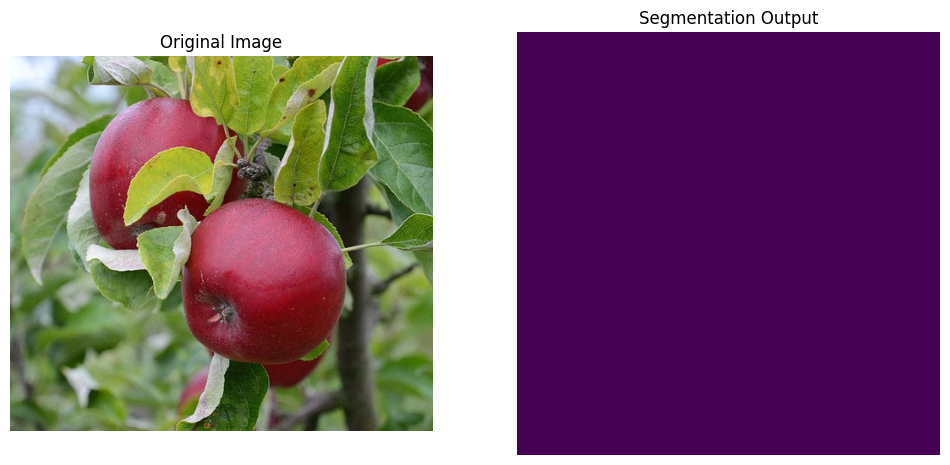

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmentation Output")
# plt.imshow(output, cmap='tab20b')  # Use a colormap to visualize different classes
plt.imshow(output)
plt.axis('off')

plt.show()

### Instance Segmentation

In [153]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import cv2 as cv

# Step 1: Initialize model with the best available weights
# weights = FCN_ResNet50_Weights.DEFAULT
weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

model = maskrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

In [154]:
# load the image and perform preprocessing
image_path = 'apple.png'
image = Image.open(image_path).convert("RGB")
preprocess = T.Compose([
    T.ToTensor(),
])
img_preprocess = preprocess(image).unsqueeze(0)

In [149]:
# make a prediction
with torch.no_grad():
    predictions = model(img_preprocess)

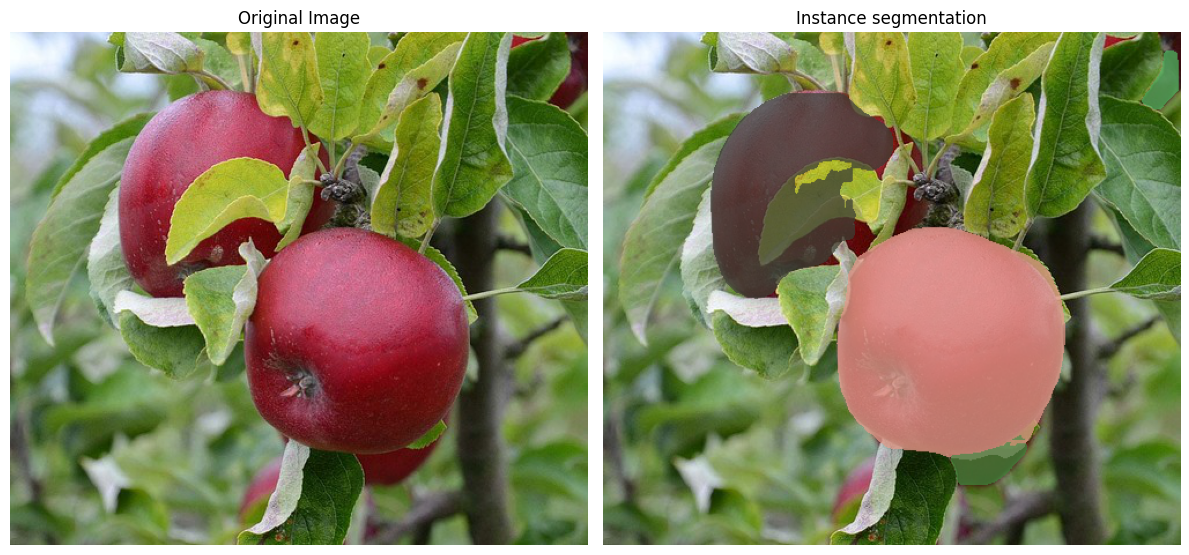

In [169]:
# Extract boxes, labels, scores, and masks from predictions
boxes = predictions[0]['boxes'].cpu().detach().numpy()
labels = predictions[0]['labels'].cpu().detach().numpy()
scores = predictions[0]['scores'].cpu().detach().numpy()
masks = predictions[0]['masks'].cpu().detach().numpy()


# Draw bounding boxes and masks on the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_seg = img.copy()
threshold = 0.5
for i in range(len(masks)):
    if scores[i] > threshold:
        # box = boxes[i]
        mask = masks[i, 0]
        color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

        # Draw bounding box
        # cv.rectangle(image, (box[0], box[1]), (box[2], box[3]), color, 2)

        # Draw mask
        mask = mask > 0.5
        img_seg[mask] = img_seg[mask] * 0.5 + np.array(color) * 0.5

# plt.figure(figsize=(12, 8))
# plt.imshow(img_seg)
# plt.axis('off')
# plt.show()

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_seg)
axes[1].set_title('Instance segmentation')
axes[1].axis('off')

plt.tight_layout()
plt.show()

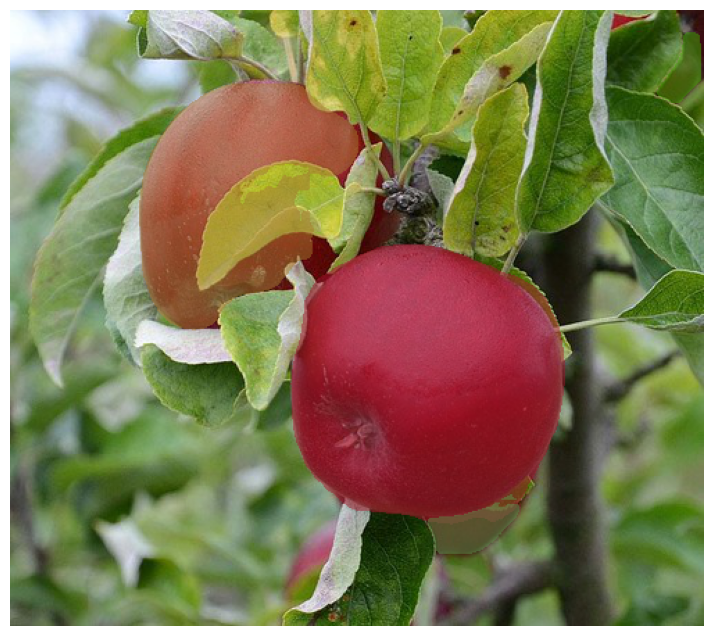

In [157]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the pretrained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    preprocess = T.Compose([
        T.ToTensor(),
    ])
    return preprocess(image).unsqueeze(0)

# Function to visualize the predictions
def visualize_predictions(image_path, predictions, threshold=0.5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract boxes, labels, scores, and masks from predictions
    boxes = predictions[0]['boxes'].cpu().detach().numpy()
    labels = predictions[0]['labels'].cpu().detach().numpy()
    scores = predictions[0]['scores'].cpu().detach().numpy()
    masks = predictions[0]['masks'].cpu().detach().numpy()

    # Draw bounding boxes and masks on the image
    for i in range(len(boxes)):
        if scores[i] > threshold:
            box = boxes[i]
            mask = masks[i, 0]
            color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

            # Draw bounding box
            # cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), color, 2)

            # Draw mask
            mask = mask > 0.5
            image[mask] = image[mask] * 0.5 + np.array(color) * 0.5

    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Path to your input image
image_path = 'apple.png'

# Preprocess the image and make prediction
image_tensor = preprocess_image(image_path)
with torch.no_grad():
    predictions = model(image_tensor)

# Visualize the predictions
visualize_predictions(image_path, predictions)


## Section 4: Object detection

In [90]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

### Object detection...



#### Load model and pre-trained weights

In [91]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:03<00:00, 56.3MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [ ]:
# !pip install timm
# # `timm` is a deep-learning library created by Ross Wightman and is a collection of SOTA computer vision models
# # https://timm.fast.ai/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.1 MB/s eta 0:00:00


#### Load and preprocess the image

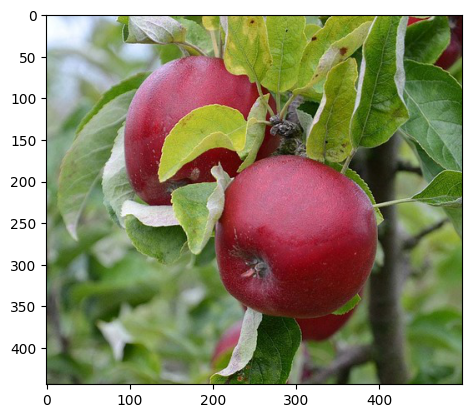

In [96]:
# load the image
# img_path = 'orange.png'
img_path = 'apple.png'
# img_path = 'horse.jpeg'
img = Image.open(img_path).convert('RGB') # make sure it is loaded in RGB
plt.imshow(img)

img = read_image('apple.png')

In [97]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

#### Predict and decode result

In [98]:
# make prediction
prediction = model(batch)[0]

#### Plot result


/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:224: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


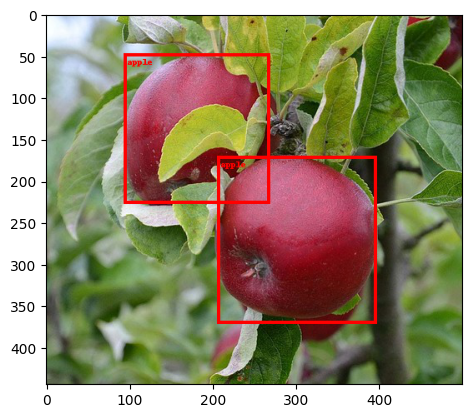

In [102]:
# Step 4: Use the model and visualize the prediction
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
# im.show()
plt.imshow(im)

## Section 5: Image Classification

## TODOs

1. Do a proper review of the main deep learning architectures for classification, object detection, segmentation. Potentially let them correspond to the ones available on PyTorch or timm
2. Work on evaluation pipeline
3. Work through the basics of Pytorch framework and the entire pipeline